In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
import math
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NYU/Study/Sem1/BigData/Project/Data/CPS/apr20pub.csv')

In [ ]:
df.head(5)

,hrhhid2,HUFINAL,OCCURNUM,HUINTTYP,HURESPLI,HUPRSCNT,HUTYPEA,HUTYPB,HUTYPC,HUBUS,HUBUSL1,HUBUSL2,HUBUSL3,HUBUSL4,HRMIS,HRMONTH,HRYEAR4,HRLONGLK,qstnum,gereg,gestfips,gediv,hehousut,hxhousut,hephoneo,hxphoneo,hetelavl,hxtelavl,hetelhhd,hxtelhhd,hrhtype,hrintsta,hrnumhou,hefaminc,hxfaminc,hwhhwgt,hwhhwtln,PULINENO,PUCHINHH,PUWK,...,pxschft,prnlfsch,pedisear,pediseye,pedisrem,pedisphy,pedisdrs,pedisout,pxdisear,pxdiseye,pxdisrem,pxdisphy,pxdisdrs,pxdisout,prdisflg,pecert1,pecert2,pecert3,pxcert1,pxcert2,pxcert3,pwsswgt,pwlgwgt,pwvetwgt,pworwgt,pwfmwgt,pwcmpwgt,pthr,ptwk,ptot,ptnmemp1,ptnmemp2,hrhhid,gtcbsa,gtco,gtcbsast,gtcbsasz,gtcsa,gtmetsta,gtindvpc
0,9011,201,1,2,2,0,-1,-1,-1,2,-1,-1,-1,-1,6,4,2020,2,1,3,1,6,1,0,1,0,-1,1,1,0,6,1,2,10,0,16223027.0,1.0,1.0,9.0,1.0,...,-1.0,-1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,-1.0,-1.0,20.0,0.0,0.0,16223027.0,24976502.0,15905335.0,0.0,16223027.0,16114481.0,0,0,0,-1.0,-1.0,171300765541000,33860,0,2,3,0,1,0
1,9011,201,2,2,2,0,-1,-1,-1,2,-1,-1,-1,-1,6,4,2020,2,1,3,1,6,1,0,1,0,-1,1,1,0,6,1,2,10,0,16223027.0,1.0,2.0,9.0,2.0,...,-1.0,-1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,-1.0,-1.0,20.0,0.0,0.0,17792459.0,27283775.0,18419294.0,0.0,17792459.0,18360535.0,0,0,0,-1.0,-1.0,171300765541000,33860,0,2,3,0,1,0
2,9011,201,1,2,2,0,-1,-1,-1,2,-1,-1,-1,-1,6,4,2020,2,2,3,1,6,1,0,1,0,-1,1,1,0,3,1,3,11,0,34623147.0,1.0,1.0,9.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,-1.0,-1.0,20.0,0.0,0.0,34623147.0,53304793.0,40606973.0,0.0,34623147.0,32396215.0,0,0,0,-1.0,-1.0,105570010074613,33860,0,2,3,0,1,0
3,9011,201,2,2,2,0,-1,-1,-1,2,-1,-1,-1,-1,6,4,2020,2,2,3,1,6,1,0,1,0,-1,1,1,0,3,1,3,11,0,34623147.0,1.0,2.0,9.0,2.0,...,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,-1.0,-1.0,20.0,0.0,0.0,43422302.0,66585756.0,39789615.0,0.0,43422302.0,39857557.0,0,0,0,-1.0,-1.0,105570010074613,33860,0,2,3,0,1,0
4,9011,201,3,2,2,0,-1,-1,-1,2,-1,-1,-1,-1,6,4,2020,2,2,3,1,6,1,0,1,0,-1,1,1,0,3,1,3,11,0,34623147.0,1.0,3.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,37792265.0,0.0,0.0,0.0,37792265.0,0.0,0,0,0,-1.0,-1.0,105570010074613,33860,0,2,3,0,1,0


In [ ]:
df = []
for x in months:
    temp = pd.read_csv('/content/drive/MyDrive/NYU/Study/Sem1/BigData/Project/Data/CPS/'+x+'20pub.csv')
    df.append(temp)

In [ ]:
r={}
for (index,d) in enumerate(df):
    print("Month is: ",months[index])
    print("Size is: ",d.shape)
    t = d['peio1cow']==6
    t2 = d['peio1cow']==7
    s_ic = d[t]
    s_uin = d[t2]
    ic_len=len(s_ic.index)
    uic_len=len(s_uin.index)
#     print(ic_len)
#     print(uic_len)
    print('Total Business is: ',ic_len+uic_len)
    t=s_ic['pemlr']==1
    t2 = s_uin['pemlr']==1
    unemployed_ic=s_ic[t]
    unemployed_uic=s_uin[t2]

    unemployed_ic_len=len(unemployed_ic.index)
    unemployed_uic_len=len(unemployed_uic.index)
    print("Last week how many had work for pay or profit incorporated: ",unemployed_ic_len)
    print("Last week how many had work for pay or profit: unincorporated ",unemployed_uic_len)
    print("Last week how many had work for pay or profit: incorporated + unincorporated:",unemployed_ic_len+unemployed_uic_len)
    print("Business active percentage: ",(unemployed_ic_len+unemployed_uic_len)/(ic_len+uic_len)*100)
    x = 'Business active percentage'
    if x not in r:r[x] = [(unemployed_ic_len+unemployed_uic_len)/(ic_len+uic_len)*100]
    else: r[x].append((unemployed_ic_len+unemployed_uic_len)/(ic_len+uic_len)*100)
    # r.append()
    print("\n")


Month is:  jan
Size is:  (138697, 388)
Total Business is:  6198
Last week how many had work for pay or profit incorporated:  2304
Last week how many had work for pay or profit: unincorporated  3316
Last week how many had work for pay or profit: incorporated + unincorporated: 5620
Business active percentage:  90.67441110035496


Month is:  feb
Size is:  (139248, 388)
Total Business is:  6262
Last week how many had work for pay or profit incorporated:  2291
Last week how many had work for pay or profit: unincorporated  3423
Last week how many had work for pay or profit: incorporated + unincorporated: 5714
Business active percentage:  91.2488022995848


Month is:  mar
Size is:  (131578, 388)
Total Business is:  5580
Last week how many had work for pay or profit incorporated:  2003
Last week how many had work for pay or profit: unincorporated  2966
Last week how many had work for pay or profit: incorporated + unincorporated: 4969
Business active percentage:  89.05017921146954


Month is:  

In [ ]:
a = pd.DataFrame(columns=['Active Business %','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for x in r:
  l = []
  l.append(x)
  for j in r[x]:
    l.append(j)
  p = len(a)
  a.loc[p] = l

In [ ]:
a

,Active Business %,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Business active percentage,90.674411,91.248802,89.050179,74.513404,79.935521,83.802545,84.707646,86.276615,87.606279,88.502076,88.214818,86.930728


In [ ]:
a.to_csv('/content/drive/MyDrive/NYU/Study/Sem1/BigData/Project/Data/CPS/ActiveBusiness.csv')

In [ ]:
# r = pd.DataFrame(columns=['Industry','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
r={}
for (index,d) in enumerate(df):
    print("Month is: ",months[index])
    t = d['peio1cow']==6
    t2 = d['peio1cow']==7
    Business = d[t]
    temp = d[t2]

    Business = Business.append(temp)
    Active_Business = Business[Business['pemlr']==1]

    Agriculture = Business[Business['prdtind1'] == 1]
    Active_Agriculture = Active_Business[Active_Business['prdtind1'] == 1]
    print("Agriculture Active Business active Percentage: ",(len(Active_Agriculture)/len(Agriculture))*100)
    x = 'Agriculture'
    if x not in r: r[x] = [(len(Active_Agriculture)/len(Agriculture))*100]
    else: r[x].append((len(Active_Agriculture)/len(Agriculture))*100)

    Construction = Business[Business['prdtind1'] == 4]
    Active_Construction = Active_Business[Active_Business['prdtind1'] == 4]
    print("Construction Active Business active Percentage: ",(len(Active_Construction)/len(Construction))*100)
    x = 'Construction'
    if x not in r: r[x] = [(len(Active_Construction)/len(Construction))*100]
    else: r[x].append((len(Active_Construction)/len(Construction))*100)

    Manufacturing = Business[Business['prmjind1'] == 4]
    Active_Manufacturing = Active_Business[Active_Business['prmjind1'] == 4]
    print("Manufacturing Active Business active Percentage: ",(len(Active_Manufacturing)/len(Manufacturing))*100)
    x = 'Manufacturing'
    if x not in r: r[x] = [(len(Active_Manufacturing)/len(Manufacturing))*100]
    else: r[x].append((len(Active_Manufacturing)/len(Manufacturing))*100)

    Wholesale_trade = Business[Business['prdtind1'] == 21]
    Active_Wholesale_trade = Active_Business[Active_Business['prdtind1'] == 21]
    print("Wholesale_trade Active Business active Percentage: ",(len(Active_Wholesale_trade)/len(Wholesale_trade))*100)
    x = 'Wholesale_trade'
    if x not in r: r[x] = [(len(Active_Wholesale_trade)/len(Wholesale_trade))*100]
    else: r[x].append((len(Active_Wholesale_trade)/len(Wholesale_trade))*100)

    Retail_trade = Business[Business['prdtind1'] == 22]
    Active_Retail_trade = Active_Business[Active_Business['prdtind1'] == 22]
    print("Retail_trade Active Business active Percentage: ",(len(Active_Retail_trade)/len(Retail_trade))*100)
    x = 'Retail_trade'
    if x not in r: r[x] = [(len(Active_Retail_trade)/len(Retail_trade))*100]
    else: r[x].append((len(Active_Retail_trade)/len(Retail_trade))*100)

    Transportation = Business[Business['prmjind1'] == 6]
    Active_Transportation = Active_Business[Active_Business['prmjind1'] == 6]
    print("Transportation Active Business active Percentage: ",(len(Active_Transportation)/len(Transportation))*100)
    x = 'Transportation'
    if x not in r: r[x] = [(len(Active_Transportation)/len(Transportation))*100]
    else: r[x].append((len(Active_Transportation)/len(Transportation))*100)

    Information = Business[Business['prmjind1'] == 7]
    Active_Information = Active_Business[Active_Business['prmjind1'] == 7]
    print("Information Active Business active Percentage: ",(len(Active_Information)/len(Information))*100)
    x = 'Information'
    if x not in r: r[x] = [(len(Active_Information)/len(Information))*100]
    else: r[x].append((len(Active_Information)/len(Information))*100)

    Financial_Activities = Business[Business['prmjind1'] == 8]
    Active_Financial_Activities = Active_Business[Active_Business['prmjind1'] == 8]
    print("Financial_Activities Business active Percentage: ",(len(Active_Financial_Activities)/len(Financial_Activities))*100)
    x = 'Financial_Activities'
    if x not in r: r[x] = [(len(Active_Financial_Activities)/len(Financial_Activities))*100]
    else: r[x].append((len(Active_Financial_Activities)/len(Financial_Activities))*100)

    PBS = Business[Business['prmjind1'] == 9]
    Active_PBS = Active_Business[Active_Business['prmjind1'] == 9]
    print("Professional and business services Active Business active Percentage: ",(len(Active_PBS)/len(PBS))*100)
    x = 'Professional & Buisiness'
    if x not in r: r[x] = [(len(Active_PBS)/len(PBS))*100]
    else: r[x].append((len(Active_PBS)/len(PBS))*100)

    ES = Business[Business['prdtind1'] == 40]
    Active_ES = Active_Business[Active_Business['prdtind1'] == 40]
    print("Educational_Services Active Business active Percentage: ",(len(Active_ES)/len(ES))*100)
    x = 'Educational Services'
    if x not in r: r[x] = [(len(Active_ES)/len(ES))*100]
    else: r[x].append((len(Active_ES)/len(ES))*100)

    HS = Business[(Business['prdtind1'] == 41) | (Business['prdtind1'] == 42)]
    Active_HS = Active_Business[(Active_Business['prdtind1'] == 41) | (Active_Business['prdtind1'] == 42)]
    print("Health_Services Active Business active Percentage: ",(len(Active_HS)/len(HS))*100)
    x = 'Health Services'
    if x not in r: r[x] = [(len(Active_HS)/len(HS))*100]
    else: r[x].append((len(Active_HS)/len(HS))*100)

    # AER = Business[Business['prdtind1'] == 44]
    # Active_AER = Active_Business[Active_Business['prdtind1'] == 44]
    # print("Arts, entertainment, and recreation Active Business active Percentage: ",(len(Active_AER)/len(AER))*100)

    # Hotels = Business[Business['prdtind1'] == 45]
    # Active_Hotels = Active_Business[Active_Business['prdtind1'] == 45]
    # print("Arts, entertainment, and recreation Active Business active Percentage: ",(len(Active_Hotels)/len(Hotels))*100)

    AERH = Business[(Business['prdtind1'] == 44) | (Business['prdtind1'] == 45)]
    Active_AERH = Active_Business[(Active_Business['prdtind1'] == 44) | (Active_Business['prdtind1'] == 45)]
    print("Arts, entertainment,Recreation and Hotels Active Business active Percentage: ",(len(Active_AERH)/len(AERH))*100)
    x = 'Entertainment'
    if x not in r: r[x] = [(len(Active_AERH)/len(AERH))*100]
    else: r[x].append((len(Active_AERH)/len(AERH))*100)

    Restaurants = Business[Business['prdtind1'] == 46]
    Active_Restaurants = Active_Business[Active_Business['prdtind1'] == 46]
    print("Restaurants Active Business active Percentage: ",(len(Active_Restaurants)/len(Restaurants))*100)
    x = 'Restaurants'
    if x not in r: r[x] = [(len(Active_Restaurants)/len(Restaurants))*100]
    else: r[x].append((len(Active_Restaurants)/len(Restaurants))*100)

    RM = Business[Business['prdtind1'] == 47]
    Active_RM = Active_Business[Active_Business['prdtind1'] == 47]
    print("Repair and maintenance services Active Business active Percentage: ",(len(Active_RM)/len(RM))*100)
    x = 'Repair Maintenance'
    if x not in r: r[x] = [(len(Active_RM)/len(RM))*100]
    else: r[x].append((len(Active_RM)/len(RM))*100)

    PS = Business[Business['prdtind1'] == 48]
    Active_PS = Active_Business[Active_Business['prdtind1'] == 48]
    print("Personal and laundry services Active Business active Percentage: ",(len(Active_PS)/len(PS))*100)
    x = 'Personal Services'
    if x not in r: r[x] = [(len(Active_PS)/len(PS))*100]
    else: r[x].append((len(Active_PS)/len(PS))*100)

    print("")
    
    # print("Last week how many had work for pay or profit: incorporated + unincorporated:",len(unemployed))

Month is:  jan
Agriculture Active Business active Percentage:  91.10169491525424
Construction Active Business active Percentage:  87.41258741258741
Manufacturing Active Business active Percentage:  92.65306122448979
Wholesale_trade Active Business active Percentage:  87.96296296296296
Retail_trade Active Business active Percentage:  93.4560327198364
Transportation Active Business active Percentage:  89.16967509025271
Information Active Business active Percentage:  89.8876404494382
Financial_Activities Business active Percentage:  90.80459770114942
Professional and business services Active Business active Percentage:  90.74215761285387
Educational_Services Active Business active Percentage:  90.47619047619048
Health_Services Active Business active Percentage:  94.0828402366864
Arts, entertainment,Recreation and Hotels Active Business active Percentage:  90.73359073359073
Restaurants Active Business active Percentage:  92.15686274509804
Repair and maintenance services Active Business act

In [ ]:
a = pd.DataFrame(columns=['Industry','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for x in r:
  l = []
  l.append(x)
  for j in r[x]:
    l.append(j)
  p = len(a)
  a.loc[p] = l

In [ ]:
a

,Industry,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Agriculture,91.101695,93.945720,92.857143,95.089286,96.338673,97.183099,97.488584,96.819085,95.732839,94.077834,93.194707,92.386831
1,Construction,87.412587,90.466733,87.431092,73.525872,80.221130,83.592814,83.476132,84.529148,88.088088,89.355169,87.955466,84.978541
2,Manufacturing,92.653061,92.477876,93.301435,84.158416,80.219780,89.119171,88.500000,87.939698,89.565217,88.135593,88.837209,87.142857
3,Wholesale_trade,87.962963,88.990826,94.047619,87.951807,87.500000,86.363636,89.473684,86.734694,89.719626,91.891892,90.291262,84.848485
4,Retail_trade,93.456033,91.125541,90.222222,73.568282,80.465116,84.848485,88.324873,88.341969,90.094340,88.800000,88.818565,89.473684
5,Transportation,89.169675,88.926174,85.992218,70.037453,71.851852,77.816901,77.536232,82.061069,78.405316,84.868421,85.567010,85.971223
6,Information,89.887640,90.697674,80.681818,76.543210,77.777778,74.666667,84.615385,80.459770,79.347826,81.927711,75.903614,84.090909
7,Financial_Activities,90.804598,92.090395,90.293454,80.338266,84.700665,86.652542,88.800000,91.287129,91.098485,90.569745,89.462810,89.979550
8,Professional & Buisiness,90.742158,89.655172,88.701518,77.956989,83.621474,84.673605,84.642234,85.374150,85.891473,88.194444,88.784314,88.791594
9,Educational Services,90.476190,91.970803,91.071429,64.035088,73.809524,73.333333,76.146789,85.964912,87.200000,86.666667,91.472868,88.333333


In [ ]:
a.to_csv('/content/drive/MyDrive/NYU/Study/Sem1/BigData/Project/Data/CPS/ActiveBusiness_Sector_wise.csv')

In [ ]:
r={}
for (index,d) in enumerate(df):
    print("Month is: ",months[index])
    t = d['peio1cow']==6
    t2 = d['peio1cow']==7
    Business = d[t]
    temp = d[t2]

    Business = Business.append(temp)
    Active_Business = Business[Business['pemlr']==1]

    StatusAM = Business[(Business['prcitshp'] == 1) | (Business['prcitshp'] == 2) |(Business['prcitshp'] == 3) | (Business['prcitshp'] == 4)]
    StatusNAM = Business[Business['prcitshp'] == 5]

    ActiveStatusAM = Active_Business[(Active_Business['prcitshp'] == 1) | (Active_Business['prcitshp'] == 2) |(Active_Business['prcitshp'] == 3) | (Active_Business['prcitshp'] == 4)]
    ActiveStatusNAM = Active_Business[Active_Business['prcitshp'] == 5]

    
    print(" American Business active Percentage: ",(len(ActiveStatusAM)/len(StatusAM))*100)
    print(" Non American Business active Percentage: ",(len(ActiveStatusNAM)/len(StatusNAM))*100)

    x = 'Native'
    if x not in r: r[x] = [(len(ActiveStatusAM)/len(StatusAM))*100]
    else: r[x].append((len(ActiveStatusAM)/len(StatusAM))*100)

    x = 'Immigrant'
    if x not in r: r[x] = [(len(ActiveStatusNAM)/len(StatusNAM))*100]
    else: r[x].append((len(ActiveStatusNAM)/len(StatusNAM))*100)


Month is:  jan
 American Business active Percentage:  90.93264248704664
 Non American Business active Percentage:  87.00980392156863
Month is:  feb
 American Business active Percentage:  91.21691302853215
 Non American Business active Percentage:  91.66666666666666
Month is:  mar
 American Business active Percentage:  89.14505283381364
 Non American Business active Percentage:  87.73333333333333
Month is:  apr
 American Business active Percentage:  75.28859323028762
 Non American Business active Percentage:  62.68656716417911
Month is:  may
 American Business active Percentage:  80.39018503620274
 Non American Business active Percentage:  72.42524916943522
Month is:  jun
 American Business active Percentage:  83.85914919601059
 Non American Business active Percentage:  82.78388278388277
Month is:  jul
 American Business active Percentage:  84.73871733966746
 Non American Business active Percentage:  84.15492957746478
Month is:  aug
 American Business active Percentage:  86.361053229778

In [ ]:
a = pd.DataFrame(columns=['Imigration Status','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for x in r:
  l = []
  l.append(x)
  for j in r[x]:
    l.append(j)
  p = len(a)
  a.loc[p] = l

In [ ]:
a

,Imigration Status,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Native,90.932642,91.216913,89.145053,75.288593,80.390185,83.859149,84.738717,86.361053,87.773308,88.420154,88.181980,86.863619
1,Immigrant,87.009804,91.666667,87.733333,62.686567,72.425249,82.783883,84.154930,84.838710,85.213033,89.680590,88.669951,87.965616


In [ ]:
a.to_csv('/content/drive/MyDrive/NYU/Study/Sem1/BigData/Project/Data/CPS/ActiveBusiness_Imigration.csv')

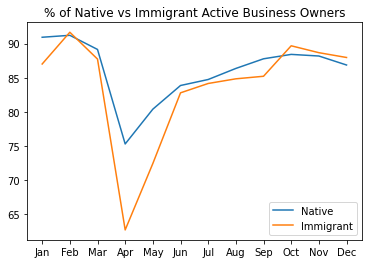

In [ ]:
X = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(X,r['Native'],label='Native')
plt.plot(X,r['Immigrant'],label='Immigrant')
plt.legend(loc = 'lower right')
plt.title('% of Native vs Immigrant Active Business Owners')
plt.show()

In [ ]:
r={}
for (index,d) in enumerate(df):
    print("Month is: ",months[index])
    t = d['peio1cow']==6
    t2 = d['peio1cow']==7
    Business = d[t]
    temp = d[t2]

    Business = Business.append(temp)
    Active_Business = Business[Business['pemlr']==1]

    White = Business[Business['ptdtrace'] == 1]
    Black = Business[Business['ptdtrace'] == 2]
    AmIn = Business[Business['ptdtrace'] == 3]
    Asian = Business[Business['ptdtrace'] == 4]

    Active_White = Active_Business[Active_Business['ptdtrace'] == 1]
    Active_Black = Active_Business[Active_Business['ptdtrace'] == 2]
    Active_AmIn = Active_Business[Active_Business['ptdtrace'] == 3]
    Active_Asian = Active_Business[Active_Business['ptdtrace'] == 4]

    print(" White Business active Percentage: ",(len(Active_White )/len(White))*100)
    print(" Black Business active Percentage: ",(len(Active_Black )/len(Black))*100)
    print(" AmIn Business active Percentage: ",(len(Active_AmIn )/len(AmIn))*100)
    print(" Asian Business active Percentage: ",(len(Active_Asian )/len(Asian))*100)

    x = 'Active_White'
    if x not in r:r[x]=[(len(Active_White )/len(White))*100]
    else: r[x].append((len(Active_White )/len(White))*100)

    x = 'Active_Black'
    if x not in r:r[x]=[(len(Active_Black )/len(Black))*100]
    else: r[x].append((len(Active_Black )/len(Black))*100)

    x = 'Active_AmIn'
    if x not in r:r[x]=[(len(Active_AmIn )/len(AmIn))*100]
    else: r[x].append((len(Active_AmIn )/len(AmIn))*100)

    x = 'Active_Asian'
    if x not in r:r[x]=[(len(Active_Asian )/len(Asian))*100]
    else: r[x].append((len(Active_Asian )/len(Asian))*100)


Month is:  jan
 White Business active Percentage:  90.94263051097583
 Black Business active Percentage:  87.71929824561403
 AmIn Business active Percentage:  81.63265306122449
 Asian Business active Percentage:  90.9090909090909
Month is:  feb
 White Business active Percentage:  91.63149201688383
 Black Business active Percentage:  85.38011695906432
 AmIn Business active Percentage:  87.27272727272727
 Asian Business active Percentage:  90.42904290429043
Month is:  mar
 White Business active Percentage:  89.41079522043675
 Black Business active Percentage:  83.77483443708608
 AmIn Business active Percentage:  77.77777777777779
 Asian Business active Percentage:  91.84397163120568
Month is:  apr
 White Business active Percentage:  76.14678899082568
 Black Business active Percentage:  59.09090909090909
 AmIn Business active Percentage:  59.45945945945946
 Asian Business active Percentage:  61.92170818505338
Month is:  may
 White Business active Percentage:  81.47109577221742
 Black Busin

In [ ]:
a = pd.DataFrame(columns=['Ethnicity','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for x in r:
  l = []
  l.append(x)
  for j in r[x]:
    l.append(j)
  p = len(a)
  a.loc[p] = l

In [ ]:
a

,Ethnicity,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Active_White,90.942631,91.631492,89.410795,76.146789,81.471096,84.836515,85.390161,86.955633,88.614232,89.498895,89.144487,87.432782
1,Active_Black,87.719298,85.380117,83.774834,59.090909,70.000000,73.622047,75.645756,75.820896,76.756757,79.187817,80.434783,81.081081
2,Active_AmIn,81.632653,87.272727,77.777778,59.459459,60.606061,81.481481,83.333333,87.804878,83.720930,78.723404,66.666667,78.260870
3,Active_Asian,90.909091,90.429043,91.843972,61.921708,68.181818,78.039216,82.773109,86.008230,84.701493,85.616438,85.401460,87.029289


In [ ]:
a.to_csv('/content/drive/MyDrive/NYU/Study/Sem1/BigData/Project/Data/CPS/ActiveBusiness_Ethnicity.csv')

In [ ]:
r = {}
for (index,d) in enumerate(df):
    # print("Month is: ",months[index])
    t = d[d['pemlr']>=2]
    # print(type[d[]])
    Un_5 = len(t[(t['pelkdur']>0) & (t['pelkdur']<5)])
    Un_14 = len(t[(t['pelkdur']>=5) & (t['pelkdur']<=14)])
    Un_26 = len(t[(t['pelkdur']>14) & (t['pelkdur']<=26)])
    Un_27 = len(t[t['pelkdur']>26])
    if(months[index]=='apr'):
      Un_5 = 55
      Un_14 = 25
      Un_26 = 10
      Un_27 = 10
    Total = Un_5 + Un_14 + Un_26 + Un_27
    x = '<5 Weeks'
    if x not in r: r[x] = [(Un_5/Total)*100]
    else: r[x].append((Un_5/Total)*100)

    x = '5 to 14 Weeks'
    if x not in r: r[x] = [(Un_14/Total)*100]
    else: r[x].append((Un_14/Total)*100)

    x = '15 to 26 Weeks'
    if x not in r: r[x] = [(Un_26/Total)*100]
    else: r[x].append((Un_26/Total)*100)

    x = '27+ Weeks'
    if x not in r: r[x] = [(Un_27/Total)*100]
    else: r[x].append((Un_27/Total)*100)
    

In [ ]:
a = pd.DataFrame(columns=['% Unemp','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for x in r:
  l = []
  l.append(x)
  for j in r[x]:
    l.append(j)
  p = len(a)
  a.loc[p] = l

In [ ]:
a.head()

,% Unemp,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,<5 Weeks,34.220743,28.742857,28.421742,55.0,30.211893,32.049224,25.957447,21.719902,22.276029,21.630479,20.633562,20.362622
1,5 to 14 Weeks,28.618968,32.571429,33.398821,25.0,38.892686,39.967897,33.244681,28.697789,24.939467,24.211389,24.828767,24.314272
2,15 to 26 Weeks,14.642263,15.828571,15.389653,10.0,14.969241,14.285714,24.095745,30.565111,30.104923,23.637853,18.535959,17.154812
3,27+ Weeks,22.518026,22.857143,22.789784,10.0,15.926179,13.697164,16.702128,19.017199,22.679580,30.520279,36.001712,38.168294


In [ ]:
a.to_csv('/content/drive/MyDrive/NYU/Study/Sem1/BigData/Project/Data/CPS/UnEmployment_time.csv')

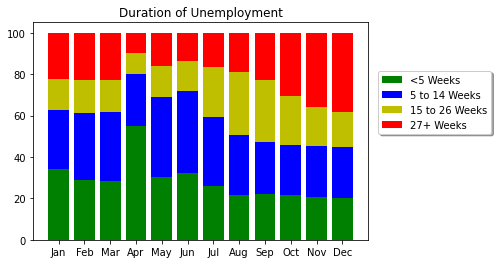

In [ ]:
# a.plot(
#     x = '% Unemp',
#     kind = 'barh',
#     stacked = True,
#     title = 'Stacked Bar Graph',
#     mark_right = True)

month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Labels = ['<5 Weeks	','5 to 14 Weeks','15 to 26 Weeks','27+ Weeks']
Un_5 = (a[(a['% Unemp'] == '<5 Weeks')].iloc[:,1:].values)[0]
Un_14 = (a[(a['% Unemp'] == '5 to 14 Weeks')].iloc[:,1:].values)[0]
Un_26 = (a[(a['% Unemp'] == '15 to 26 Weeks')].iloc[:,1:].values)[0]
Un_27 = (a[(a['% Unemp'] == '27+ Weeks')].iloc[:,1:].values)[0]
# print(len(Un_5))
plt.bar(month,Un_5,color='g',label='<5 Weeks')
plt.bar(month,Un_14,color='b',bottom=Un_5,label='5 to 14 Weeks')
plt.bar(month,Un_26,color='y',bottom=Un_5+ Un_14,label='15 to 26 Weeks')
plt.bar(month,Un_27,color='r',bottom=Un_5+ Un_14 + Un_26,label='27+ Weeks')
# plt.legend()
plt.title('Duration of Unemployment')
plt.legend(loc='upper center', bbox_to_anchor=(1.20, 0.8), shadow=True, ncol=1)
plt.show()
# for i in month:
#   plt.bar(i,a[a['% Unemp'] == '<5 Weeks'][i],color='g')
#   t = a[(a['% Unemp'] == '<5 Weeks')]
#   t = t[i]
#   bottom[i]=t.values
# for i in month:
#   plt.bar(i,a[a['% Unemp'] == '5 to 14 Weeks'][i],bottom =bottom[i],color='b')
#   t = a[(a['% Unemp'] == '5 to 14 Weeks')]
#   t = t[i]
#   bottom[i]=bottom[i] + t.values
# for i in month:
#   plt.bar(i,a[a['% Unemp'] == '15 to 26 Weeks'][i],bottom =bottom[i],color='y')
#   t = a[(a['% Unemp'] == '15 to 26 Weeks')]
#   t = t[i]
#   bottom[i]=bottom[i] + t.values

# for i in month:
#   plt.bar(i,a[a['% Unemp'] == '27+ Weeks'][i],bottom =bottom[i],color='r')
  
# plt.title('Duration of Unemployment\n')
# plt.legend()
# plt.legend(Labels, bbox_to_anchor=(['g', 1, 0, 0]), ncol=4, frameon=False)

# plt.show()

In [ ]:
r = []
total = []
cps_states = []
s = {1:"AL",30:"MT",2:"AK",31:"NE",4:"AZ",32:"NV",5:"AR",33:"NH",6:"CA",34:"NJ",8:"CO",35:"NM",9:"CT",36:"NY",10:"DE",37:"NC",11:"DC",38:"ND",12:"FL",39:"OH",13:"GA",40:"OK",15:"HI",41:"OR",16:"ID",42:"PA",17:"IL",44:"RI",18:"IN",45:"SC",19:"IA",46:"SD",20:"KS",47:"TN",21:"KY",48:"TX",22:"LA",49:"UT",23:"ME",50:"VT",24:"MD",51:"VA",25:"MA",53:"WA",26:"MI",54:"WV",27:"MN",55:"WI",28:"MS",56:"WY",29:"MO"}
for (index,d) in enumerate(df):
    # print("Month is: ",months[index])
    t = d[d['pemlr']>2]
    # print(type[d[]])
    # Un_5 = len(t[(t['pelkdur']>0) & (t['pelkdur']<5)])
    # print(t.groupby(['gestfips']).size().reset_index(name='counts'))
    # print(t.groupby(['gestfips']).size().values)
    # r.append(t.groupby(['gestfips']).size().values)
    x = t.groupby(['gestfips']).size()
    Region_index = x.index
    val = x.values
    r.append(val)
    total.append(d.groupby(['gestfips']).size().values)
    # for (i,v) in enumerate(index):
    #   print(v,":",val[i])
    # print("--------------------------")
    # print(t.groupby(['gestfips']).size())

In [ ]:
# for key in s:
#   print(key," ",s[key])
for (index,val) in enumerate(Region_index):
  print(val,"(",s[val],"): ",r[0][index]," total is: ",total[0][index])
  # print(s[val],":",(r[0][index]/total[0][index])*100)

1 ( AL ):  954  total is:  2920
2 ( AK ):  471  total is:  1666
4 ( AZ ):  680  total is:  2375
5 ( AR ):  806  total is:  2554
6 ( CA ):  3675  total is:  11374
8 ( CO ):  418  total is:  1704
9 ( CT ):  402  total is:  1373
10 ( DE ):  411  total is:  1553
11 ( DC ):  452  total is:  2412
12 ( FL ):  2011  total is:  6372
13 ( GA ):  926  total is:  3090
15 ( HI ):  564  total is:  1964
16 ( ID ):  672  total is:  2328
17 ( IL ):  1036  total is:  3663
18 ( IN ):  563  total is:  2112
19 ( IA ):  398  total is:  1500
20 ( KS ):  454  total is:  1767
21 ( KY ):  495  total is:  1740
22 ( LA ):  936  total is:  3145
23 ( ME ):  397  total is:  1364
24 ( MD ):  442  total is:  1727
25 ( MA ):  739  total is:  2815
26 ( MI ):  892  total is:  2981
27 ( MN ):  454  total is:  1879
28 ( MS ):  894  total is:  2688
29 ( MO ):  589  total is:  1973
30 ( MT ):  739  total is:  2631
31 ( NE ):  380  total is:  1684
32 ( NV ):  553  total is:  1810
33 ( NH ):  492  total is:  1968
34 ( NJ ):  7

In [ ]:
a = pd.DataFrame(columns=['States','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for (index,val) in enumerate(Region_index):
  # print(val,"(",s[val],"): ",r[0][index]," total is: ",total[0][index])
  p =len(a)
  l = []
  l.append(s[val])
  for month in range(12):
    l.append((r[month][index]/total[0][index])*100)
  a.loc[p] = l

In [ ]:
a

,States,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,AL,32.671233,32.534247,29.760274,32.328767,27.876712,26.780822,25.719178,26.575342,31.780822,31.232877,31.232877,32.054795
1,AK,28.271309,27.370948,27.370948,30.312125,28.451381,25.570228,25.630252,25.930372,25.690276,23.949580,24.489796,24.309724
2,AZ,28.631579,28.505263,26.610526,28.294737,24.547368,23.663158,24.042105,23.621053,28.968421,30.652632,31.326316,30.315789
3,AR,31.558340,30.422866,28.269381,29.639781,26.977291,26.272514,25.685200,25.567737,31.440877,31.949883,30.305403,29.287392
4,CA,32.310533,32.574292,28.661860,32.609460,32.099525,29.505891,27.800246,28.283805,32.257781,32.600668,32.266573,28.951996
5,CO,24.530516,23.415493,24.647887,27.523474,25.469484,24.295775,25.938967,26.877934,25.704225,25.821596,24.471831,26.173709
6,CT,29.278951,28.623452,27.166788,29.861617,29.206118,27.603787,28.769119,30.444283,31.828114,32.483613,30.007283,28.696286
7,DE,26.464907,26.336124,27.301996,29.104958,30.006439,28.203477,24.533162,29.426916,30.779137,30.972312,32.517708,30.779137
8,DC,18.739635,18.988391,18.200663,21.973466,21.475954,18.988391,19.941957,20.149254,20.232172,21.144279,22.056385,20.232172
9,FL,31.559950,32.532957,28.860640,32.062147,29.817954,27.605148,27.212806,26.224105,31.748274,32.705587,32.485876,31.763967
